In [ ]:
!pip install scikit-learn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
x=df['review']
x.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [ ]:
x.shape

(50000,)

In [ ]:
y = df['sentiment']
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [ ]:
y.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train)
print(x_train.shape)
print(x_train.size)

39087    That's what I kept asking myself during the ma...
30893    I did not watch the entire movie. I could not ...
45278    A touching love story reminiscent of In the M...
16398    This latter-day Fulci schlocker is a totally a...
13653    First of all, I firmly believe that Norwegian ...
                               ...                        
11284    `Shadow Magic' recaptures the joy and amazemen...
44732    I found this movie to be quite enjoyable and f...
38158    Avoid this one! It is a terrible movie. So wha...
860      This production was quite a surprise for me. I...
15795    This is a decent movie. Although little bit sh...
Name: review, Length: 40000, dtype: object
(40000,)
40000


In [ ]:
print(x_test)
print(x_test.shape)
print(x_test.size)

33553    I really liked this Summerslam due to the look...
9427     Not many television shows appeal to quite as m...
199      The film quickly gets to a major chase scene w...
12447    Jane Austen would definitely approve of this o...
39489    Expectations were somewhat high for me when I ...
                               ...                        
28567    Although Casper van Dien and Michael Rooker ar...
25079    I liked this movie. I wasn't really sure what ...
18707    Yes non-Singaporean's can't see what's the big...
15200    As far as films go, this is likable enough. En...
5857     I saw Anatomy years ago -- dubbed at a friends...
Name: review, Length: 10000, dtype: object
(10000,)
10000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
x_train_counts = vec.fit_transform(x_train)
x_train_counts

<40000x93003 sparse matrix of type '<class 'numpy.int64'>'
	with 5455841 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_count = vec.transform(x_test)
x_test_count

<10000x93003 sparse matrix of type '<class 'numpy.int64'>'
	with 1361185 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(x_train_counts, y_train)

MultinomialNB()

In [ ]:
y_pred = cls.predict(x_test_count)
y_pred

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4361,  600],
       [ 912, 4127]])

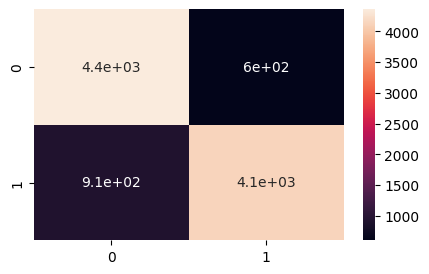

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pt
import seaborn as sn
pt.figure(figsize = (5,3))
sn.heatmap(cm, annot=True)
#pt.Xlabels('Prediction')
#pt.Ylabels('Truth')
pt.show()

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8488